In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) ## view all the columns

In [3]:
from dotenv import load_dotenv
import os
import sys
sys.path.insert(0,'../../src/')
from utlis import Utils as ul
from lib import Lib as lp

sys.path.insert(0,'../../database/')
from db_connection import DBConnect as dbconnect
# Load environment variables from .env file
load_dotenv()

True

In [4]:
# Create a connection to the PostgreSQL database
engine = dbconnect.connect_to_db()
# Query to retrieve all rows from the aggrated_data
query = "SELECT * FROM aggrated_data"
# Execute the query and load the result into a Pandas DataFrame
df = pd.read_sql(query, engine)
engine.dispose()

In [5]:
# Display the DataFrame
df.head()

,MSISDN/Number,num of xDR sessions,Total_Session_Duration_ms,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
0,3.360100e+10,1,116720.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,8.426375e+08,36053108.0
1,3.360100e+10,1,181230.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,1.207552e+08,36104459.0
2,3.360100e+10,1,134969.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,5.566597e+08,39306820.0
3,3.360101e+10,1,49878.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,4.019932e+08,20327526.0
4,3.360101e+10,2,37104.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,1.363130e+09,94280527.0


## In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
- [X] sessions frequency.
- [X] the duration of the session
- [X] the sessions total traffic (download and upload (bytes))

In [6]:
## session frequency
df['session_frequceny'] = df.groupby('MSISDN/Number')['num of xDR sessions'].transform('sum')

In [7]:
df_new = df[['MSISDN/Number','Total DL (Bytes)','Total UL (Bytes)','Total_Session_Duration_ms', 'session_frequceny']]
df_new.head(10)

,MSISDN/Number,Total DL (Bytes),Total UL (Bytes),Total_Session_Duration_ms,session_frequceny
0,3.360100e+10,8.426375e+08,36053108.0,116720.0,1
1,3.360100e+10,1.207552e+08,36104459.0,181230.0,1
2,3.360100e+10,5.566597e+08,39306820.0,134969.0,1
3,3.360101e+10,4.019932e+08,20327526.0,49878.0,1
4,3.360101e+10,1.363130e+09,94280527.0,37104.0,2
5,3.360101e+10,5.552080e+08,60009249.0,253983.0,2
6,3.360101e+10,5.530412e+08,101681858.0,128360.0,2
7,3.360101e+10,2.940851e+08,38575279.0,86399.0,1
8,3.360101e+10,8.965602e+08,93572016.0,495702.0,2
9,3.360102e+10,6.853728e+08,47091008.0,124854.0,1


In [8]:
df.describe()

,MSISDN/Number,num of xDR sessions,Total_Session_Duration_ms,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes),session_frequceny
count,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,106856.000000
mean,4.511474e+10,1.403768,1.468461e+05,2.520215e+06,46223.872178,8.072721e+06,2.886907e+06,2.515171e+06,6.560837e+05,1.633154e+07,1.545465e+07,1.632140e+07,1.544391e+07,5.924527e+08,1.163499e+07,5.911273e+08,1.160186e+07,6.382130e+08,5.772451e+07,1.403768
std,2.889423e+12,0.815348,1.870154e+05,1.904078e+06,35007.785540,6.116286e+06,2.191069e+06,1.911952e+06,4.989479e+05,1.242508e+07,1.169852e+07,1.241631e+07,1.171067e+07,4.477022e+08,8.802371e+06,4.473991e+08,8.780899e+06,4.685374e+08,3.603939e+07,0.815348
min,3.360100e+10,1.000000,7.142000e+03,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,8.827082e+06,2.866892e+06,1.000000
25%,3.365088e+10,1.000000,7.212600e+04,1.182570e+06,21725.000000,3.825379e+06,1.351031e+06,1.193333e+06,3.085762e+05,7.693985e+06,7.297081e+06,7.645548e+06,7.250106e+06,2.812613e+08,5.484199e+06,2.783012e+08,5.494074e+06,3.168184e+08,3.647665e+07,1.000000
50%,3.366365e+10,1.000000,1.032025e+05,2.277580e+06,41773.500000,7.295978e+06,2.607482e+06,2.279187e+06,5.901760e+05,1.468533e+07,1.394454e+07,1.471149e+07,1.395726e+07,5.357665e+08,1.050514e+07,5.326505e+08,1.043461e+07,5.734108e+08,4.696081e+07,1.000000
75%,3.368344e+10,2.000000,1.727990e+05,3.282296e+06,60212.250000,1.047417e+07,3.761975e+06,3.266164e+06,8.563992e+05,2.123068e+07,2.006141e+07,2.122954e+07,2.010213e+07,7.704607e+08,1.514423e+07,7.684201e+08,1.509665e+07,8.108985e+08,6.680990e+07,2.000000
max,8.823971e+14,18.000000,1.855375e+07,4.274384e+07,630942.000000,1.161065e+08,3.608540e+07,3.360721e+07,9.013997e+06,2.378830e+08,2.150757e+08,1.994792e+08,2.032419e+08,7.622035e+09,1.547897e+08,8.025477e+09,1.529305e+08,8.156743e+09,7.295774e+08,18.000000


#### Based on the above submit python script and slide :
- [X] Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 
- [ ] Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.
- [ ] Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
- [ ] Aggregate user total traffic per application and derive the top 10 most engaged users per application.
- [ ] Plot the top 3 most used applications using appropriate chart.
- [ ] Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:
    - [ ] what is the optimized value of k (use elbow method for this)?
    - [ ] interpret your findings


In [9]:
## aggregate per customer and report the top 10 customers per engagement metric

## for session frequency
df_new_copy = df_new.copy()
df_new_copy.sort_values(by='session_frequceny', ascending=False, inplace=True, ignore_index=True)

top_10_customer_for_frequency = df_new_copy[['MSISDN/Number', 'session_frequceny']].head(10)


In [10]:
top_10_customer_for_frequency

,MSISDN/Number,session_frequceny
0,3.362632e+10,18
1,3.362578e+10,17
2,3.361489e+10,17
3,3.365973e+10,16
4,3.376054e+10,15
5,3.367588e+10,15
6,3.366716e+10,13
7,3.360313e+10,12
8,3.376041e+10,12
9,3.378632e+10,12


In [11]:
## for session duration
df_new_copy = df_new.copy()
df_new_copy.sort_values(by='Total_Session_Duration_ms', ascending=False, inplace=True, ignore_index=True)

top_10_customer_for_duration = df_new_copy[['MSISDN/Number', 'Total_Session_Duration_ms']].head(10)

In [12]:
top_10_customer_for_duration

,MSISDN/Number,Total_Session_Duration_ms
0,3.362578e+10,18553754.0
1,3.361489e+10,9966898.0
2,3.376054e+10,9279434.0
3,3.362632e+10,8791927.0
4,3.366716e+10,8744914.0
5,3.366284e+10,6614270.0
6,3.366469e+10,6288730.0
7,3.360313e+10,6287761.0
8,3.366746e+10,5649882.0
9,3.376041e+10,5321667.0


In [13]:
## for Total Upload
df_new_copy = df_new.copy()
df_new_copy.sort_values(by='Total UL (Bytes)', ascending=False, inplace=True, ignore_index=True)

top_10_customer_for_total_ul = df_new_copy[['MSISDN/Number', 'Total UL (Bytes)']].head(10)

In [14]:
top_10_customer_for_total_ul

,MSISDN/Number,Total UL (Bytes)
0,3.362578e+10,729577380.0
1,3.376054e+10,703478581.0
2,3.361489e+10,689483001.0
3,3.362632e+10,669650721.0
4,3.365973e+10,624260321.0
5,3.367588e+10,581568792.0
6,3.366716e+10,566326364.0
7,3.369879e+10,530343105.0
8,3.376041e+10,521518890.0
9,3.376127e+10,496467102.0


In [15]:
## for Total download
df_new_copy = df_new.copy()
df_new_copy.sort_values(by='Total DL (Bytes)', ascending=False, inplace=True, ignore_index=True)

top_10_customer_for_total_dl = df_new_copy[['MSISDN/Number', 'Total DL (Bytes)']].head(10)

In [16]:
top_10_customer_for_total_dl

,MSISDN/Number,Total DL (Bytes)
0,3.361489e+10,8.156743e+09
1,3.376054e+10,7.811295e+09
2,3.362578e+10,7.770043e+09
3,3.367588e+10,7.309542e+09
4,3.362632e+10,7.301517e+09
5,3.365973e+10,7.081602e+09
6,3.366646e+10,6.903440e+09
7,3.376041e+10,6.610852e+09
8,3.366471e+10,6.400774e+09
9,3.369879e+10,6.010556e+09


#### Normalize each engagement metric 

In [17]:
df_new.describe().round(2)

,MSISDN/Number,Total DL (Bytes),Total UL (Bytes),Total_Session_Duration_ms,session_frequceny
count,1.068560e+05,1.068560e+05,1.068560e+05,106856.00,106856.00
mean,4.511474e+10,6.382130e+08,5.772451e+07,146846.05,1.40
std,2.889423e+12,4.685374e+08,3.603939e+07,187015.39,0.82
min,3.360100e+10,8.827082e+06,2.866892e+06,7142.00,1.00
25%,3.365088e+10,3.168184e+08,3.647665e+07,72126.00,1.00
50%,3.366365e+10,5.734108e+08,4.696081e+07,103202.50,1.00
75%,3.368344e+10,8.108985e+08,6.680990e+07,172799.00,2.00
max,8.823971e+14,8.156743e+09,7.295774e+08,18553754.00,18.00


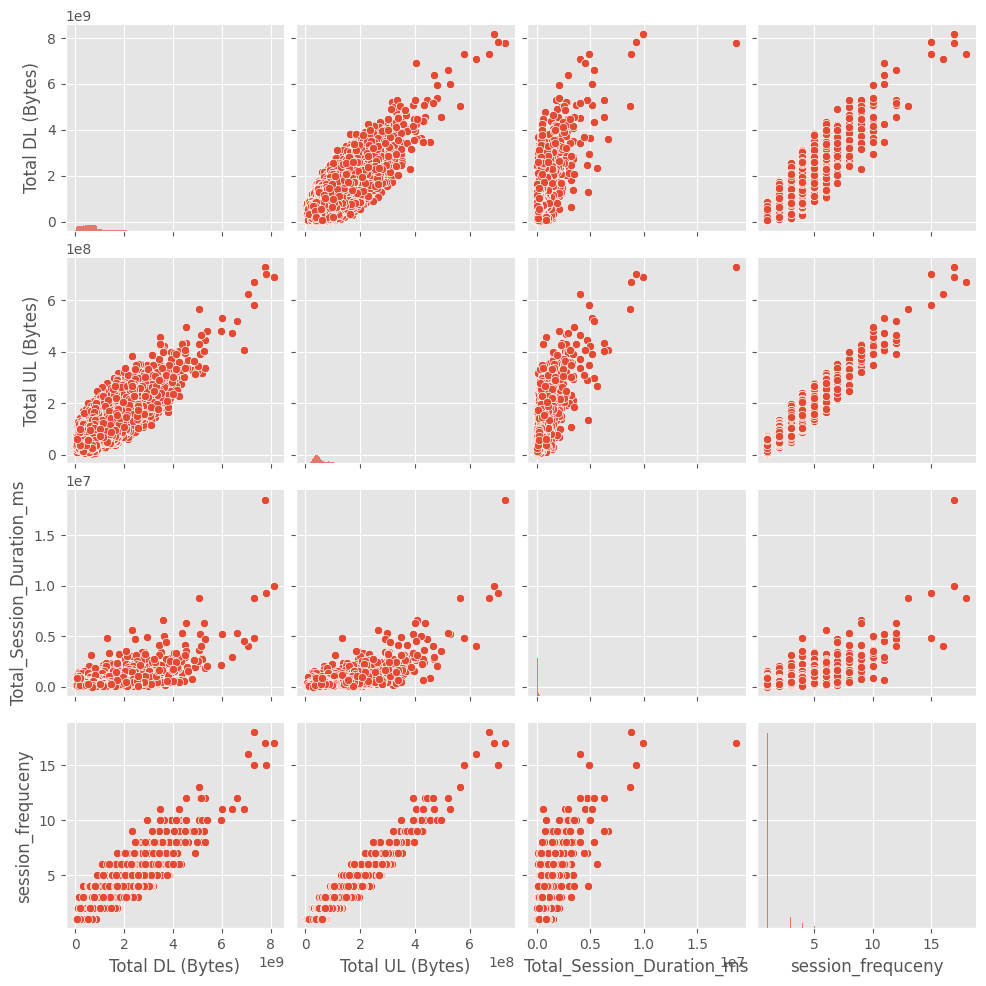

In [18]:
# How it look before the normalization
sns.pairplot(df_new[['Total DL (Bytes)','Total UL (Bytes)', 'Total_Session_Duration_ms', 'session_frequceny']])

In [19]:
# # from statistics import *
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# # scaler = MinMaxScaler()
# #normal_df = scaler.fit_transform(df_new[['Total DL (Bytes)','Total UL (Bytes)', 'Total_Session_Duration_ms', 'session_frequceny']])